In [21]:
import numpy as np
import sympy as sym
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [22]:
#システムパラメータを与える
A = np.array([[0.0, 1.0], [-6.0,-5.0]]) #行列A
b = np.array([[0.0], [1.0]]) #ベクトルb
c = np.array([[1.0, 0.0]]) #ベクトルc
d = 0 #スカラーd

In [23]:
#配置するオブザーバの極を与える
op = [-1,-2] #-1，-2をオブザーバの極とする

#オブザーバゲインを求める．双対システムA^Tとc^Tの状態フィードバックゲインを求め，転置を取るとオブザーバゲインとなる
h = matlab.place(A.T, c.T, op).T #双対システムで極配置し，転置を求める
print("observer gain =", h) #オブザーバゲインの表示

observer gain = [[-2.]
 [ 6.]]


In [24]:
#Ah = A-hcとオブザーバの極の計算と表示
Ah = A - h*c #Ah = A-hcの計算
(eig_obs, eig_vec_obs) = np.linalg.eig(Ah) #Ahの固有値を求める
print('Ah = ',Ah) #Ahを表示
print('observer pole =',eig_obs) #オブザーバの極を表示

Ah =  [[  2.   1.]
 [-12.  -5.]]
observer pole = [-1. -2.]


In [25]:
#システムとオブザーバ（誤差システム（11.15)式）の状態空間表現を求める
cc = np.array([[1.0, 0.0],[0.0,1.0]])#状態変数をプロットするためにcを単位行列にする
dd = np.array([[0.0],[0.0]])#cに合わせてdを零ベクトルとする

sys = matlab.ss(A, b, cc, dd) #システムの状態空間表現
e_sys = matlab.ss(Ah, b, cc, dd) #誤差システムの状態空間表現

In [26]:
#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#システムとオブザーバの初期値を与える
x0 = np.array([[1.0],[1.0]]) #x(0) = [1;1]'
x0_ob = np.array([[0.0],[0.0]])  #xob(0) = [0;0]'

#初期値応答の計算
y, t = matlab.initial(sys, t, x0) #システムの初期値応答
e, t = matlab.initial(e_sys, t, x0_ob-x0) #誤差システムの初期値応答

#オブザーバの状態を求める
h_x = e + y #e(t) = hat{x}(t) - x(t)よりhat{x}を求める

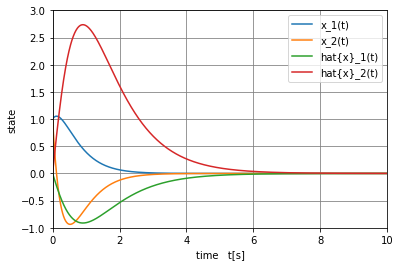

In [27]:
# 図11.3(a)のプロット
plt.plot(t, y[:,0], label = "x_1(t)")#x_{1}を抽出してplotする
plt.plot(t, y[:,1], label = "x_2(t)")#x_{2}を抽出してplotする
plt.plot(t, h_x[:,0], label = "hat{x}_1(t)")#hat{x}_{1}を抽出してplotする
plt.plot(t, h_x[:,1], label = "hat{x}_2(t)")#hat{x}_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-1.0, 3.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("state") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show()

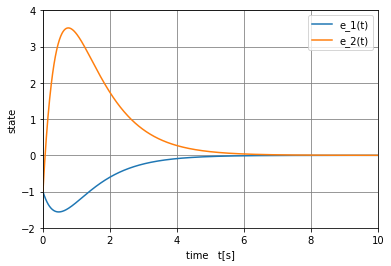

In [29]:
# 図11.3(b)の描画
plt.plot(t, e[:,0], label = "e_1(t)")#e_{1}を抽出してplotする
plt.plot(t, e[:,1], label = "e_2(t)")#e_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.0, 4.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("state") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show()